## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [2]:
customer_set = pd.read_csv("Mall_Customers.csv")

In [3]:
customer_set.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "SpendingScore"}, inplace=True)
customer_set.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [4]:
customer_set.columns.tolist()

['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore']

In [5]:
customer_set.shape

(200, 5)

In [6]:
customer_set.describe()

,CustomerID,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
customer_set.isnull().sum()

CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [8]:
customer_set.drop(columns=["CustomerID"], inplace=True)
customer_set.head()

,Gender,Age,Income,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

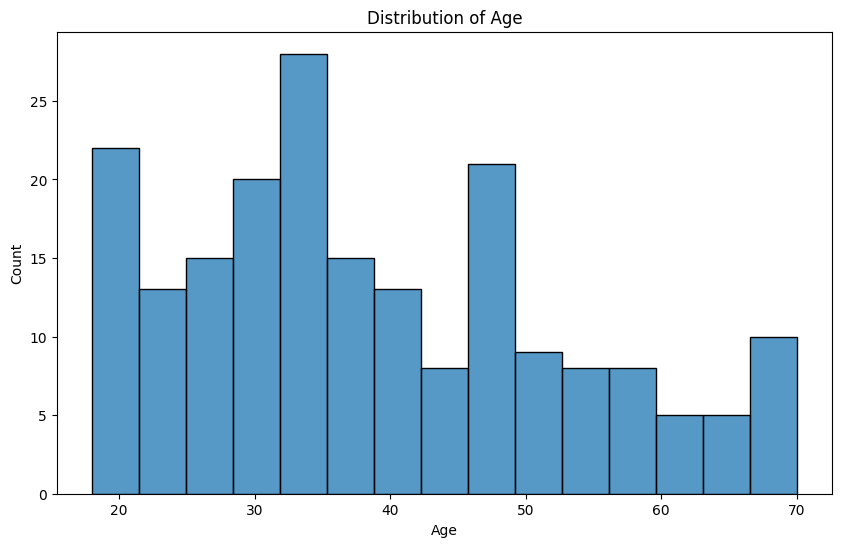

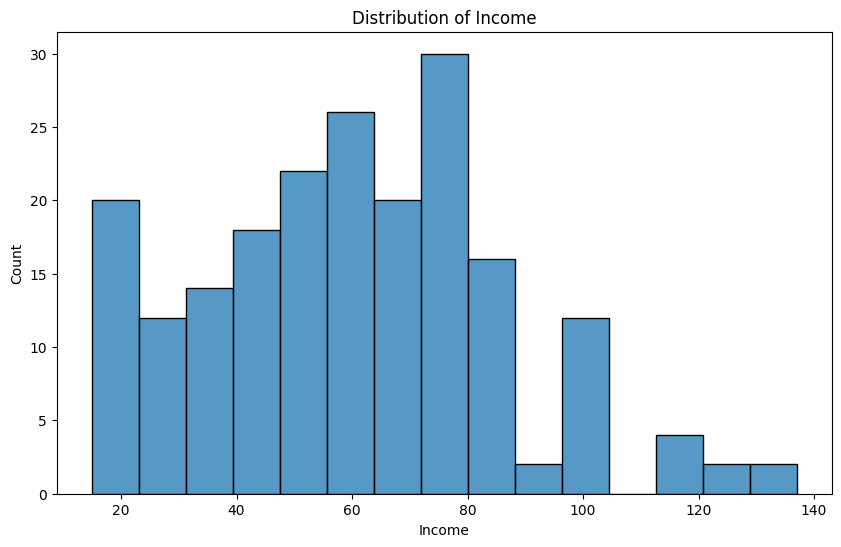

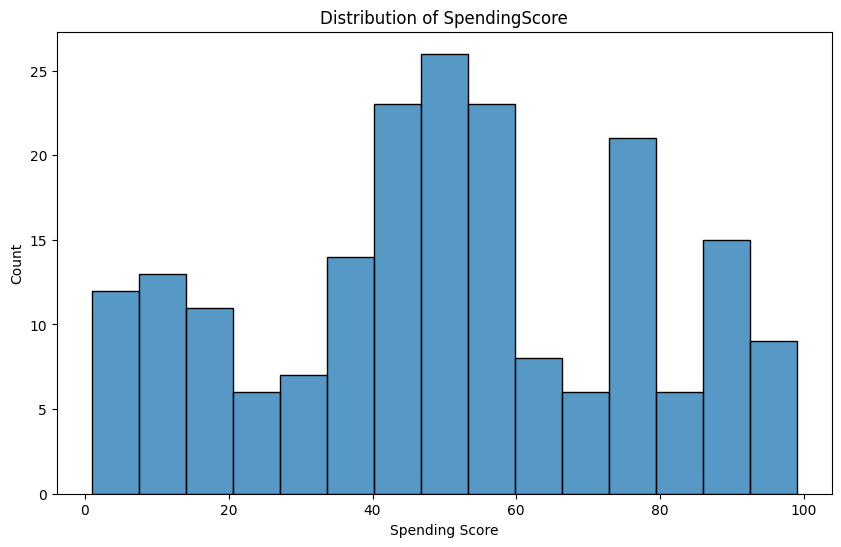

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Age', bins=15, kde=False)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Income', bins=15, kde=False)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='SpendingScore', bins=15, kde=False)
plt.title('Distribution of SpendingScore')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show()

**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

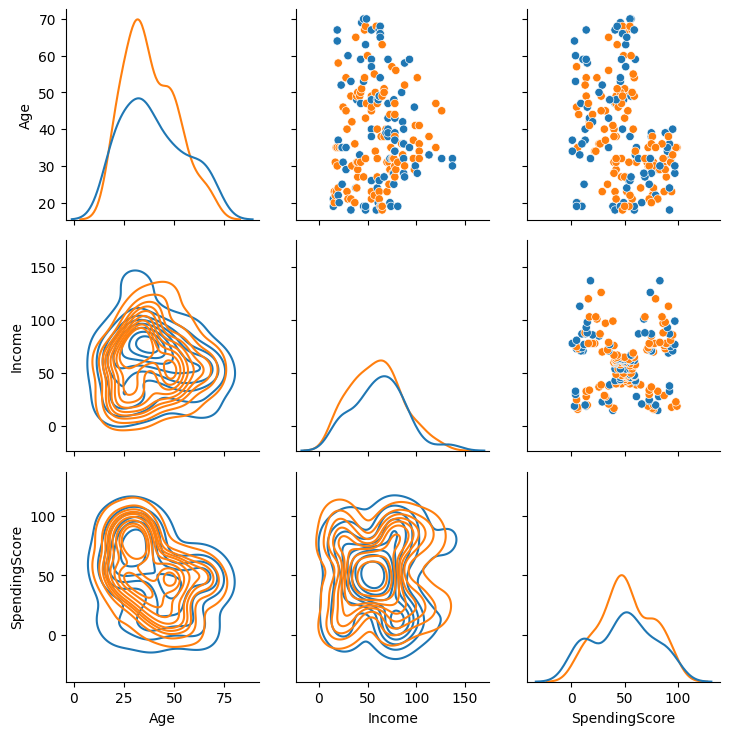

In [10]:
gender = sns.PairGrid(customer_set, hue="Gender", vars=["Age", "Income", "SpendingScore"])
gender.map_upper(sns.scatterplot)
gender.map_diag(sns.kdeplot)
gender.map_lower(sns.kdeplot, lw=1)
plt.show()

**Висновки з 1-4 завдання (детальні)**

1.   була проаналізована структура датасету. датасет містить 200 рядків і 5 змінних. пропущених значень нема, що дозволяє одразу перейти до аналізу без очищення

2.   в другому завданні була видалена змінна CustomerID, оскільки вона є унікальним ідентифікатором і не несе корисної інформації для аналізу

3. аналіз розподілу змінних показав, що більшість клієнтів мають вік 25–40 років, дохід у межах 30–90 тис. $, а SpendingScore має рівномірний розподіл, що свідчить про наявність різних типів покупців

4.  при порівнянні змінних за статтю клієнтів виявлено, що чоловіки й жінки мають схожий вік і дохід, однак витрати відрізняються. жінки частіше мають вищі показники SpendingScore

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

In [11]:
gender_count = customer_set["Gender"].value_counts()
gender_count

Gender
Female    112
Male       88
Name: count, dtype: int64

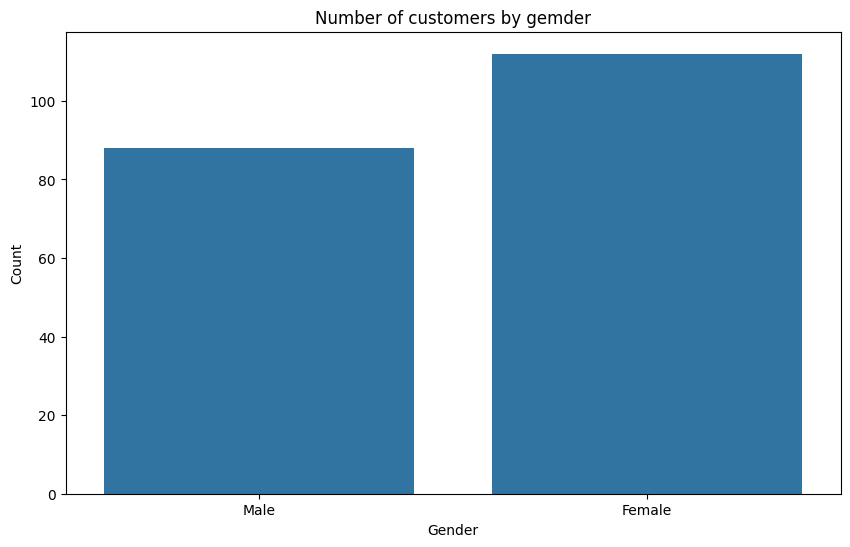

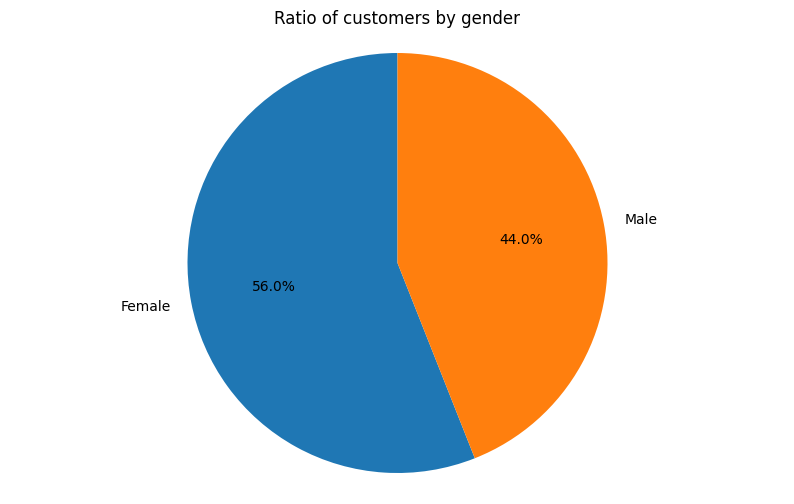

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_set, x='Gender')
plt.title("Number of customers by gemder")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)
plt.title("Ratio of customers by gender")
plt.axis('equal')
plt.show()

**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

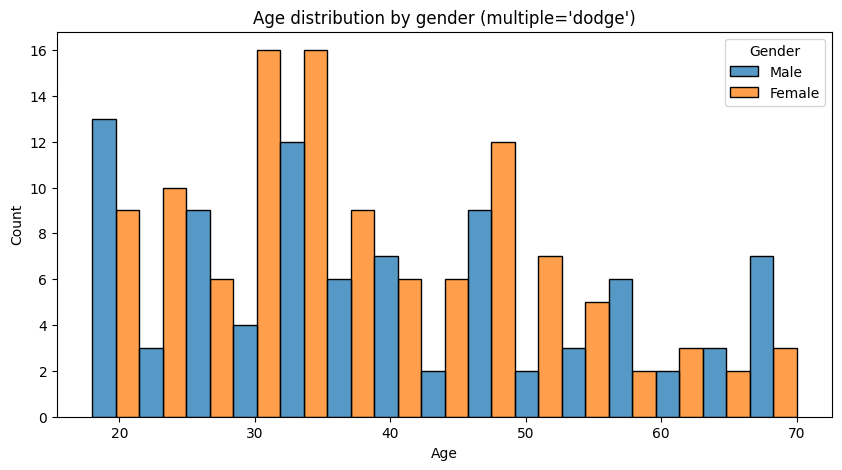

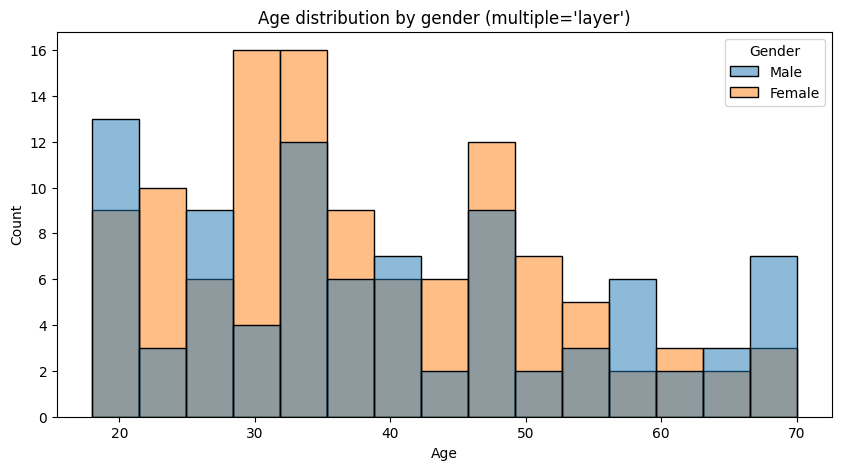

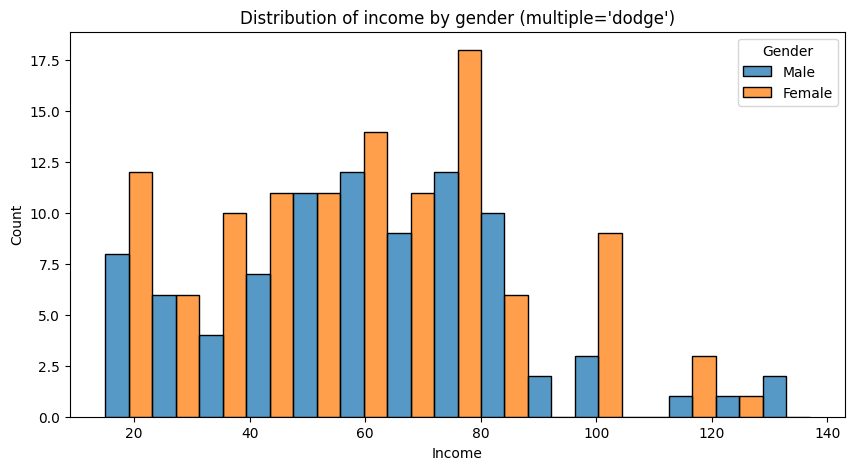

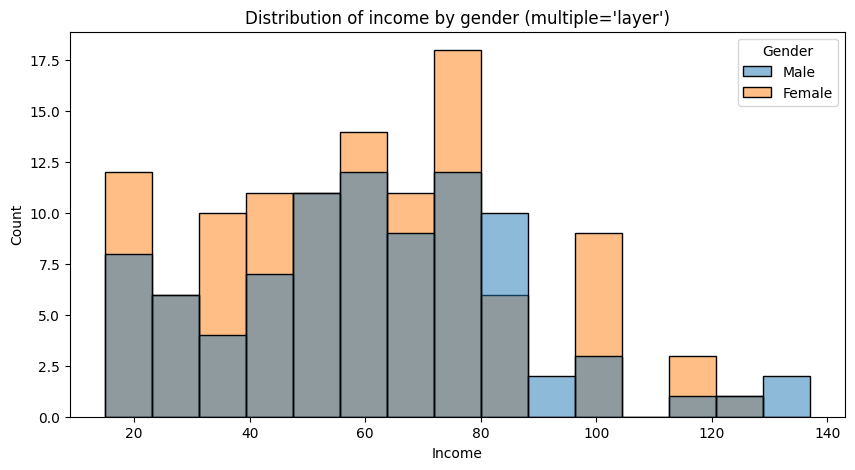

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='dodge', bins=15)
plt.title("Age distribution by gender (multiple='dodge')")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='layer', bins=15)
plt.title("Age distribution by gender (multiple='layer')")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='dodge', bins=15)
plt.title("Distribution of income by gender (multiple='dodge')")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='layer', bins=15)
plt.title("Distribution of income by gender (multiple='layer')")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



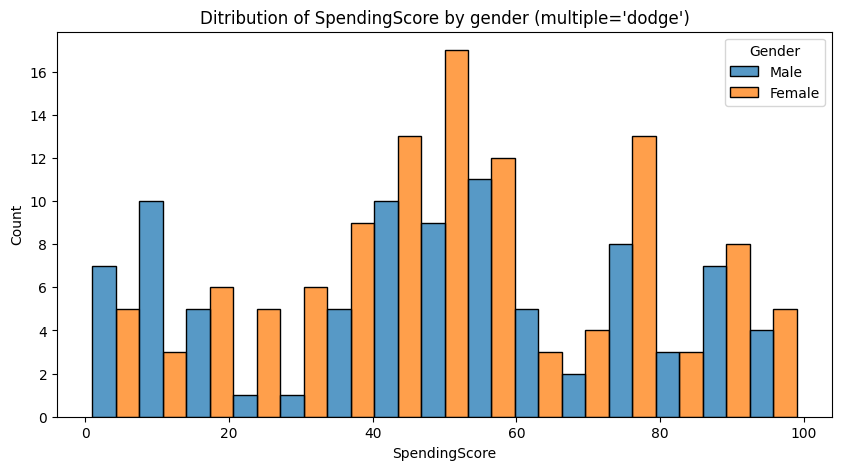

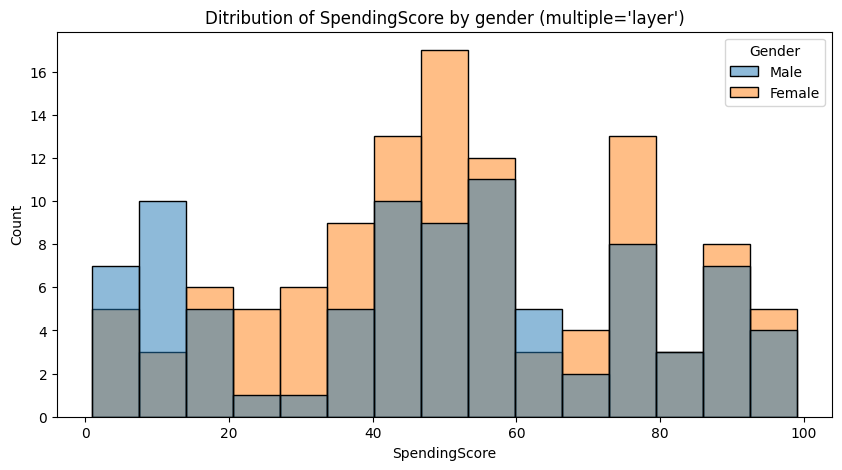

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='dodge', bins=15)
plt.title("Ditribution of SpendingScore by gender (multiple='dodge')")
plt.xlabel("SpendingScore")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='layer', bins=15)
plt.title("Ditribution of SpendingScore by gender (multiple='layer')")
plt.xlabel("SpendingScore")
plt.ylabel("Count")
plt.show()

**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

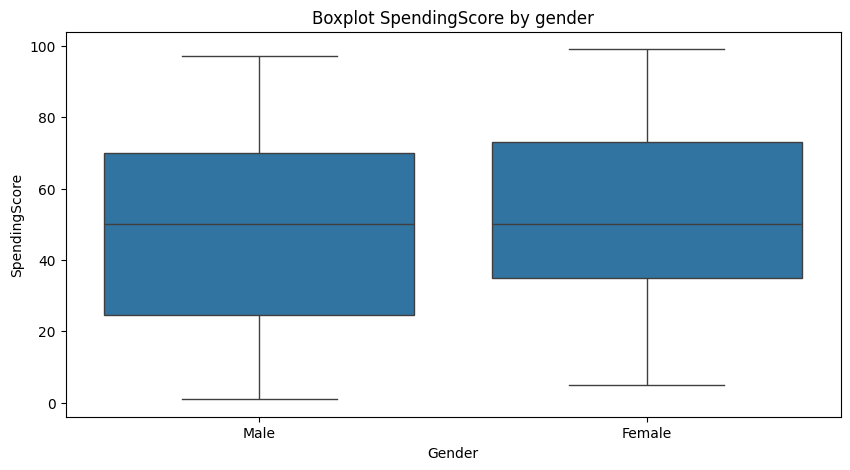

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=customer_set, x='Gender', y='SpendingScore')
plt.title("Boxplot SpendingScore by gender")
plt.xlabel("Gender")
plt.ylabel("SpendingScore")
plt.show()

**Висновки з завдання 5 - 8(детальні)**

1.   у п’ятому завданні була проаналізована змінна Gender. у вибірці нараховується 112 жінок (56%) і 88 чоловіків (44%), що вказує на незначну перевагу жінок серед клієнтів. це співвідношення добре видно на графіках countplot та круговій діаграмі, які чітко демонструють переважання жінок

2.  у шостому та сьомому завданнях були побудовані гістограми розподілу змінних Age, Income і SpendingScore з урахуванням статі. візуалізація з параметрами multiple='dodge' та multiple='layer' показала, що серед жінок більше молодших клієнток із середнім рівнем доходу, а серед чоловіків частіше зустрічаються клієнти з вищим доходом. щодо SpendingScore, можна виділити групу жінок з високим рівнем витрат і водночас чоловіків із нижчими значеннями витрат

3. у восьмому завданні графік boxplot допоміг чітко порівняти розподіл витрат між чоловіками та жінками. у жінок виявлений трохи вищий SpendingScore, а також більший розкид значень, що вказує на ширший діапазон покупцевої активності. у чоловіків, натомість, витрати зосереджені в більш вузькому діапазоні, з меншою кількістю викидів

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

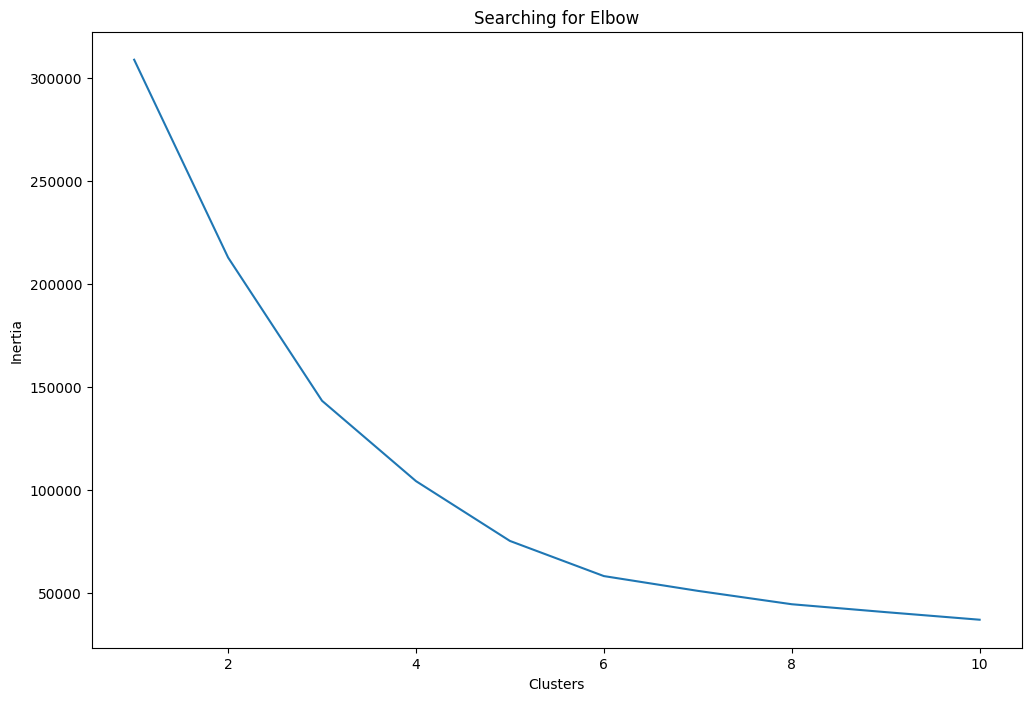

In [16]:
X = customer_set.drop(['Gender'], axis=1)
clusters = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

**Висновки з завдання 9 (детальні)** 

у цьому завданні методом Elbow була визначена оптимальна кількість кластерів для кластеризації даних без міток. після видалення змінної Gender і побудови графіка інерції стало помітно, що найбільший злам кривої відбувається на рівні 3 кластерів, що свідчить про наявність трьох основних груп клієнтів. водночас помітний ще один перелом біля 5 кластерів, тому доцільно також протестувати цей варіант. отже, найбільш логічно перевірити кластеризацію з 3 і 5 кластерами, щоб обрати найкращу сегментацію

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

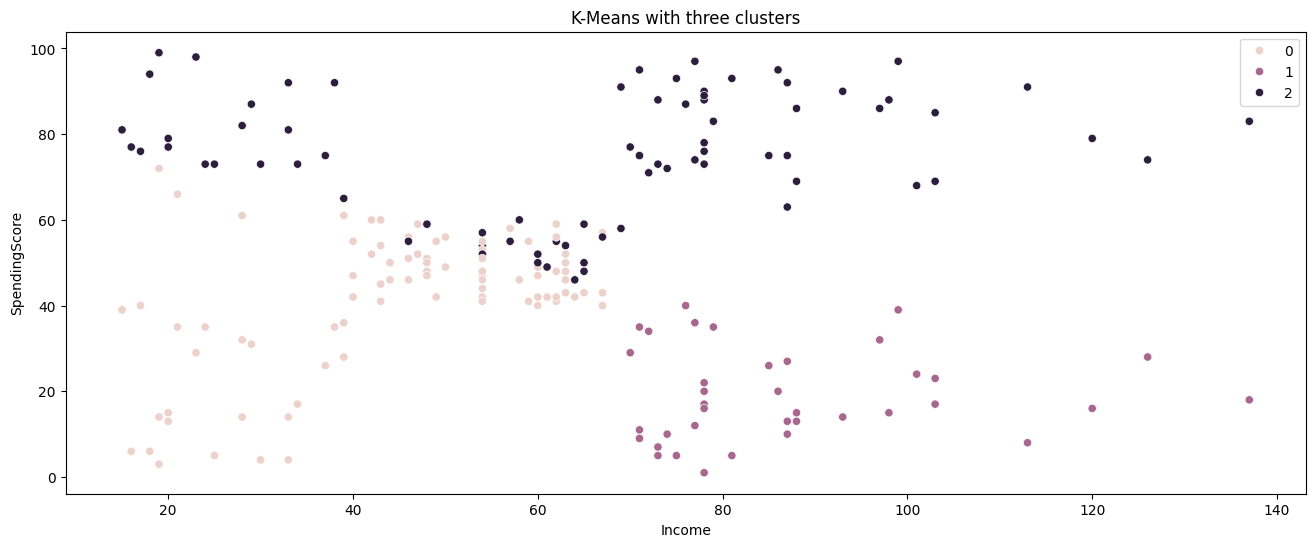

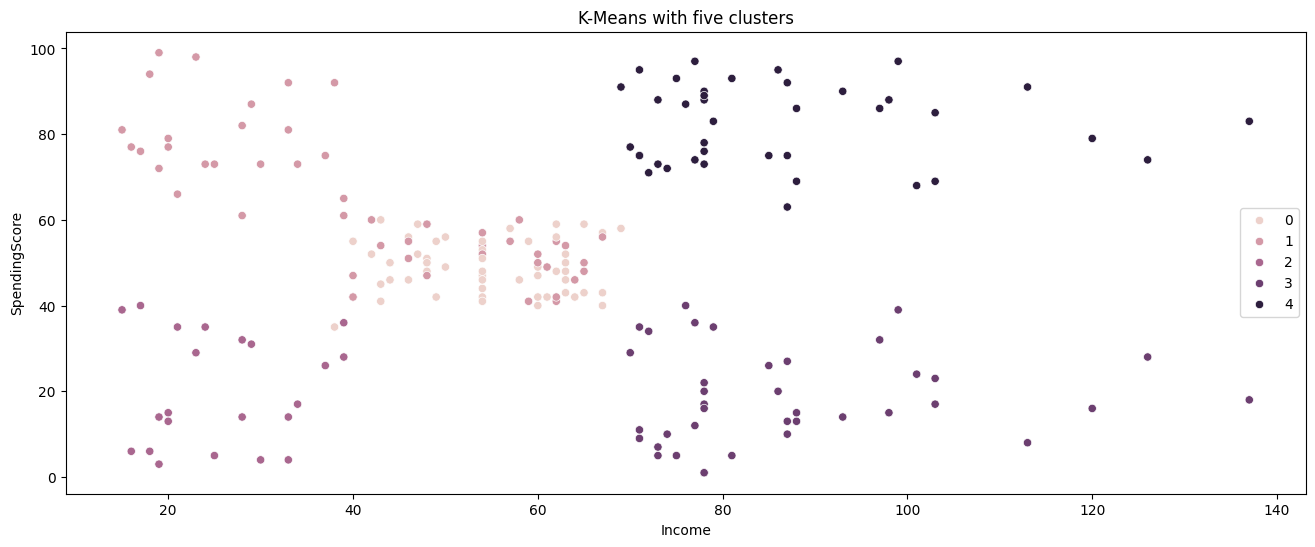

In [ ]:
three_clusters = KMeans(n_clusters=3).fit_predict(X)
five_clusters = KMeans(n_clusters=5).fit_predict(X)

plt.figure(figsize=(16, 6))
sns.scatterplot(x='Income', y='SpendingScore', hue=three_clusters, data=X)
plt.title("K-Means with three clusters")
plt.xlabel("Income")
plt.ylabel("SpendingScore")
plt.show()

plt.figure(figsize=(16, 6))
sns.scatterplot(x='Income', y='SpendingScore', hue=five_clusters, data=X)
plt.title("K-Means with five clusters")
plt.xlabel("Income")
plt.ylabel("SpendingScore")
plt.show()

**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [23]:
fig_three = px.scatter_3d(data_frame=X, x='Income', y='SpendingScore', z='Age', color=three_clusters.astype(str))
fig_three.show()

fig_five = px.scatter_3d(data_frame=X, x='Income', y='SpendingScore', z='Age', color=five_clusters.astype(str))
fig_five.show()

**Висновки з завдання 10 - 11 (детальні)** 

у завданнях 10–11 була проведена кластеризація методом K-середніх з поділом на 3 та 5 кластерів. візуалізація у 2D та 3D показала, що варіант із 5 кластерами краще відображає різноманіття клієнтів. кластери чітко розділяються за рівнем доходу, витрат і віку, що дозволяє точніше сегментувати клієнтів. видно групи з високим доходом і низькими витратами, або навпаки з низьким доходом, але активною споживчою поведінкою. тому, класифікація на 5 кластерів є оптимальною для подальшого аналізу

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


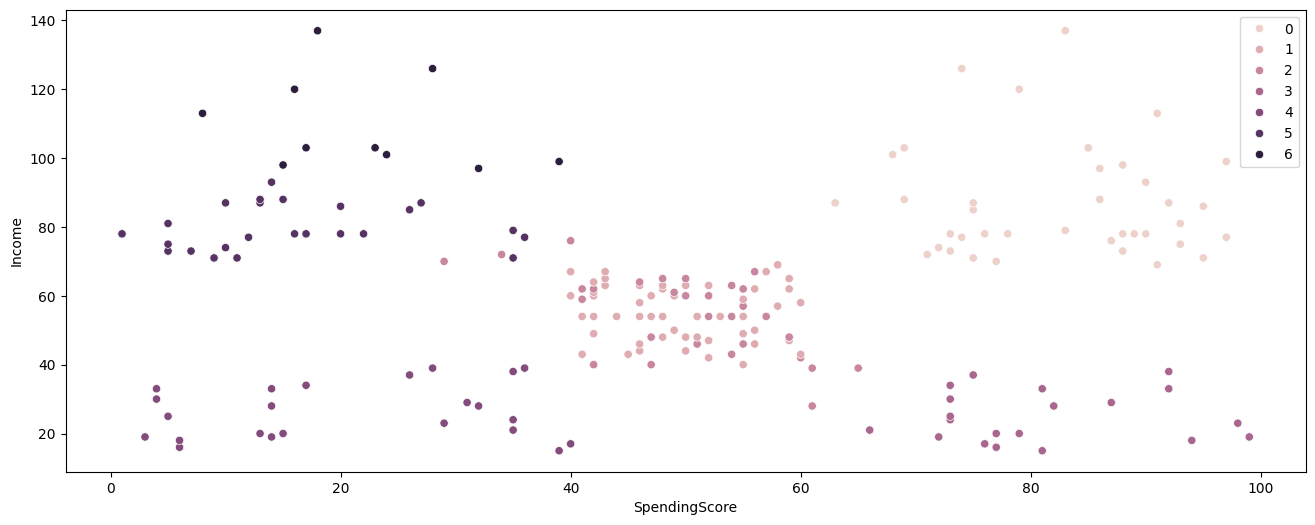

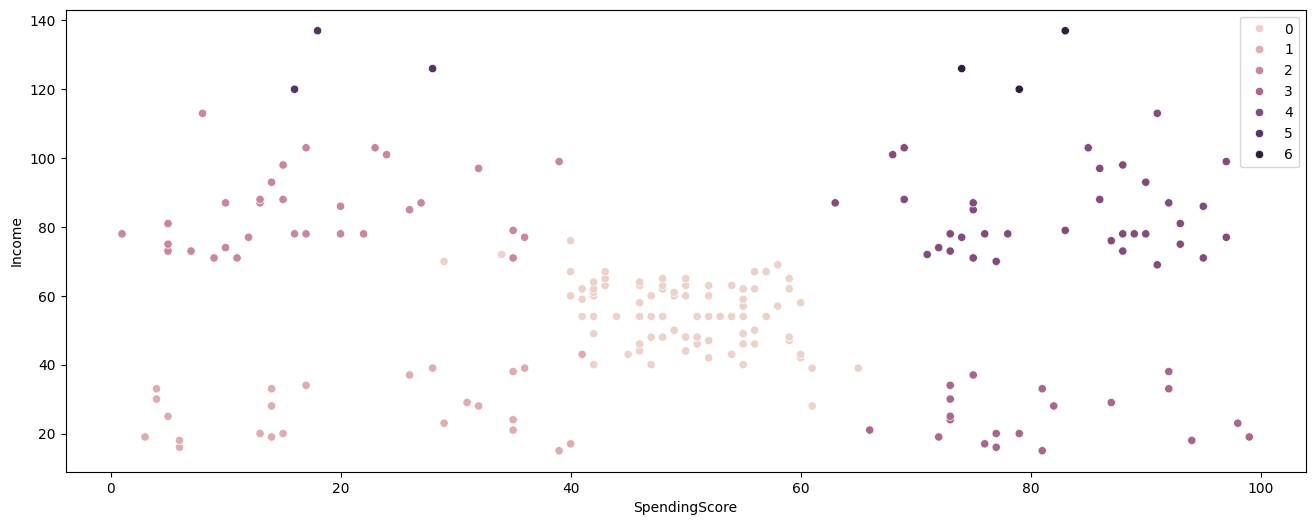

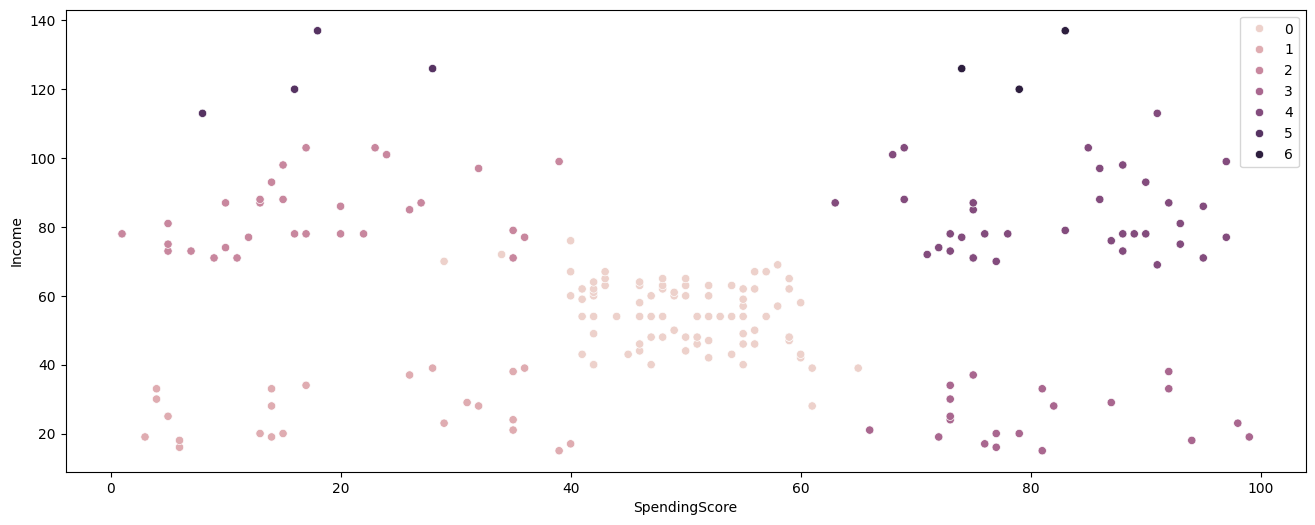

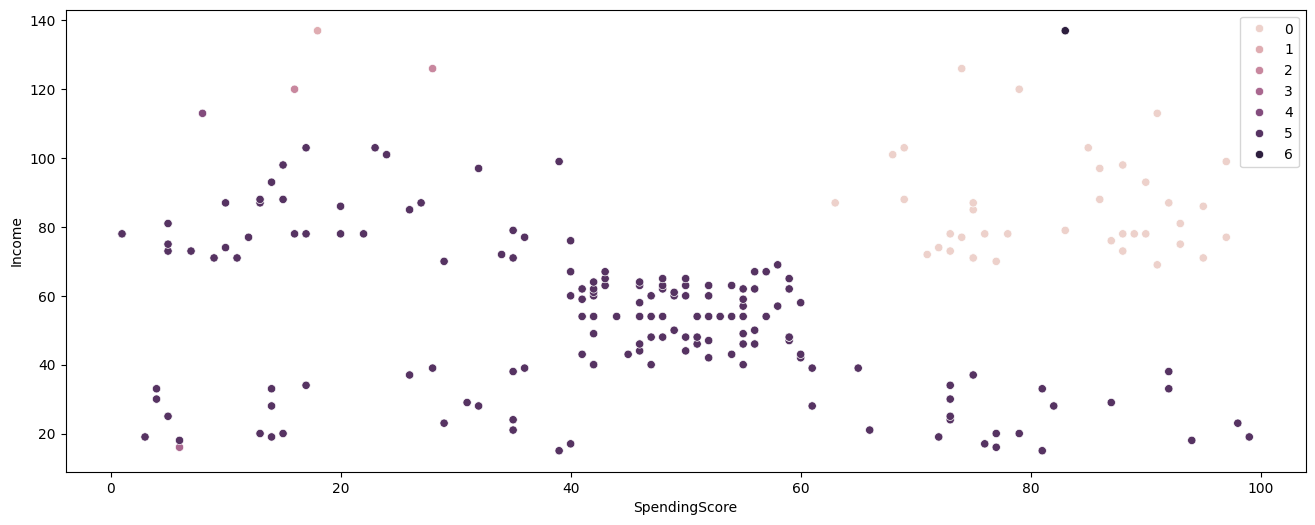

In [26]:
ward_clustering = AgglomerativeClustering(n_clusters=7, linkage='ward')
average_clustering = AgglomerativeClustering(n_clusters=7, linkage='average')
complete_clustering = AgglomerativeClustering(n_clusters=7, linkage='complete')
single_clustering = AgglomerativeClustering(n_clusters=7, linkage='single')

first_cluster = ward_clustering.fit_predict(X)
second_cluster = average_clustering.fit_predict(X)
third_cluster = complete_clustering.fit_predict(X)
fourth_cluster = single_clustering.fit_predict(X)

plt.figure(figsize=(16, 6))
sns.scatterplot(x='SpendingScore', y='Income', data=X, hue=first_cluster)
plt.show()

plt.figure(figsize=(16, 6))
sns.scatterplot(x='SpendingScore', y='Income', data=X, hue=second_cluster)
plt.show()

plt.figure(figsize=(16, 6))
sns.scatterplot(x='SpendingScore', y='Income', data=X, hue=third_cluster)
plt.show()

plt.figure(figsize=(16, 6))
sns.scatterplot(x='SpendingScore', y='Income', data=X, hue=fourth_cluster)
plt.show()

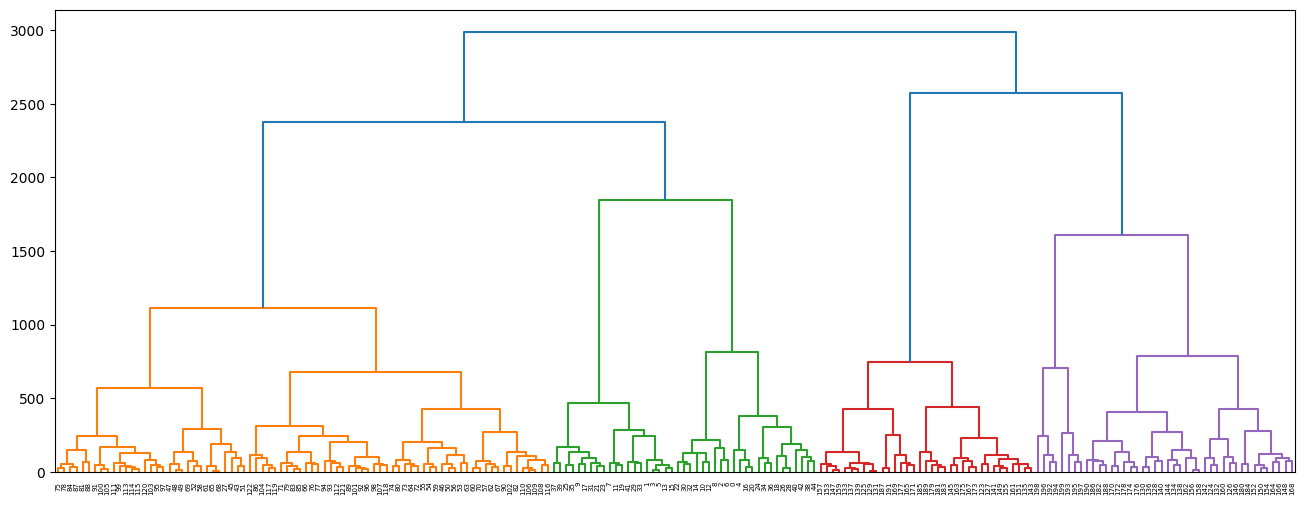

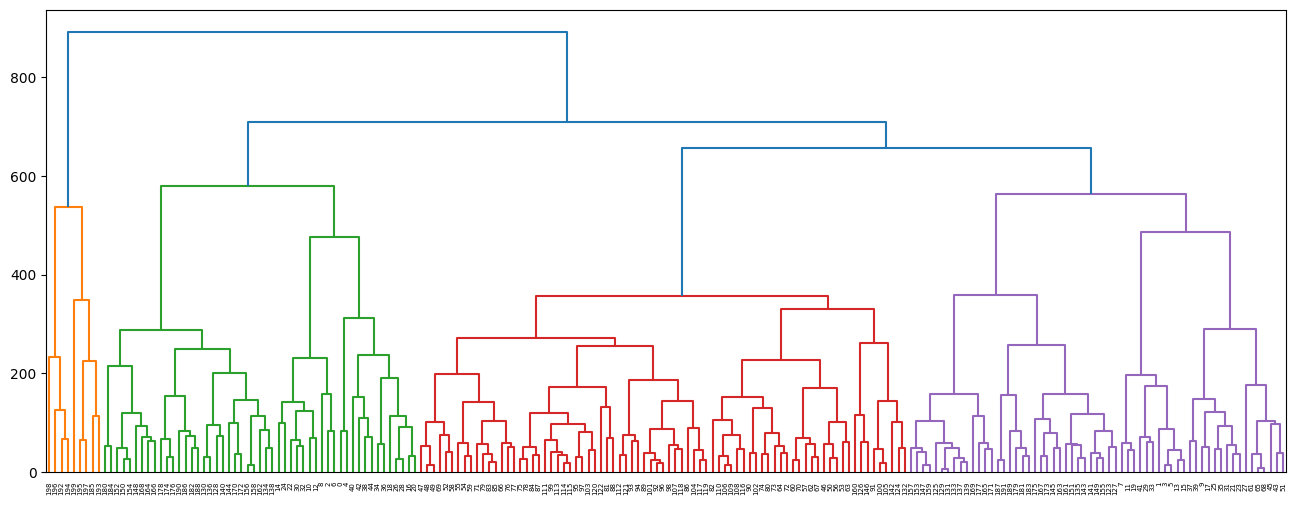

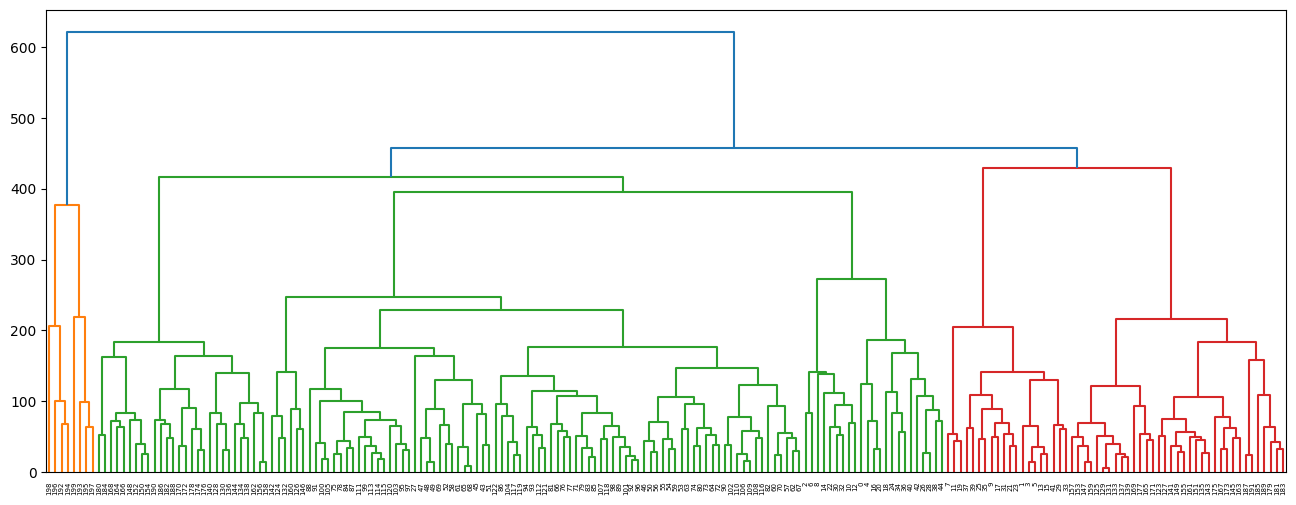

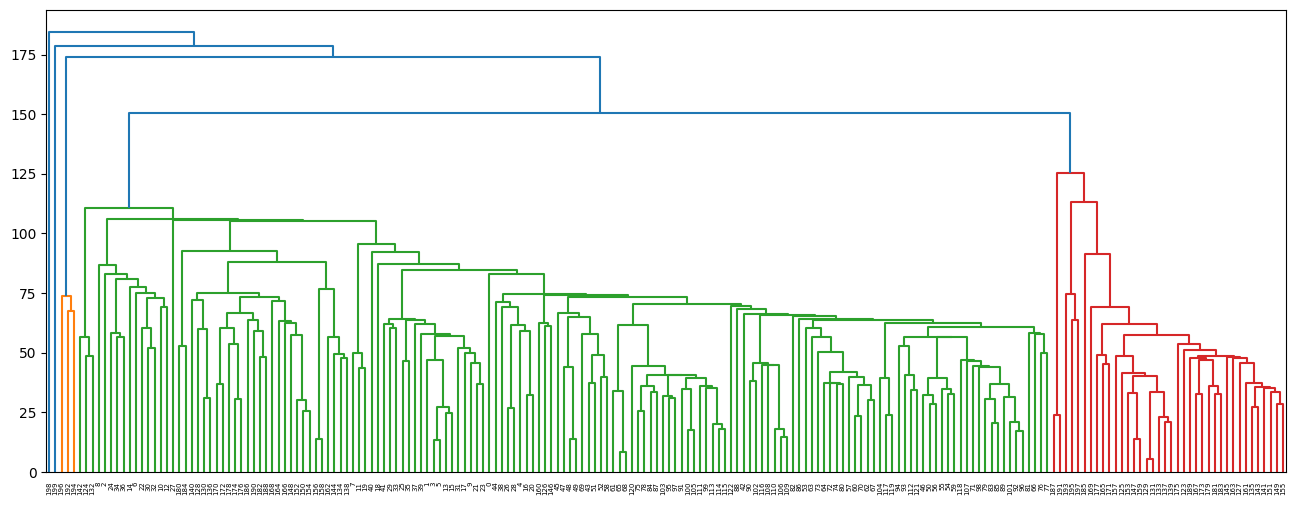

In [31]:
coordinates = X[['Age', 'SpendingScore', 'Income']].values
dist_matrix = distance_matrix(coordinates, coordinates)

hierarchy_ward = hierarchy.linkage(dist_matrix, method='ward')
hierarchy_complete = hierarchy.linkage(dist_matrix, method='complete')
hierarchy_average = hierarchy.linkage(dist_matrix, method='average')
hierarchy_single = hierarchy.linkage(dist_matrix, method='single')

plt.figure(figsize=(16, 6))
first_dendrogram = hierarchy.dendrogram(hierarchy_ward, orientation='top')
plt.show()

plt.figure(figsize=(16, 6))
second_dendrogram = hierarchy.dendrogram(hierarchy_complete, orientation='top')
plt.show()

plt.figure(figsize=(16, 6))
third_dendrogram = hierarchy.dendrogram(hierarchy_average, orientation='top')
plt.show()

plt.figure(figsize=(16, 6))
fourth_dendrogram = hierarchy.dendrogram(hierarchy_single, orientation='top')
plt.show()

**Висновки з завдання 12 (детальні)**

найкращий результат дав метод ward, оскільки сформував чіткі та симетричні кластери. інші методи (complete, average, single) дали менш виразні або витягнуті групи. дендрограми підтвердили, що ward найкраще підходить для визначення структури кластерів у цьому наборі даних

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

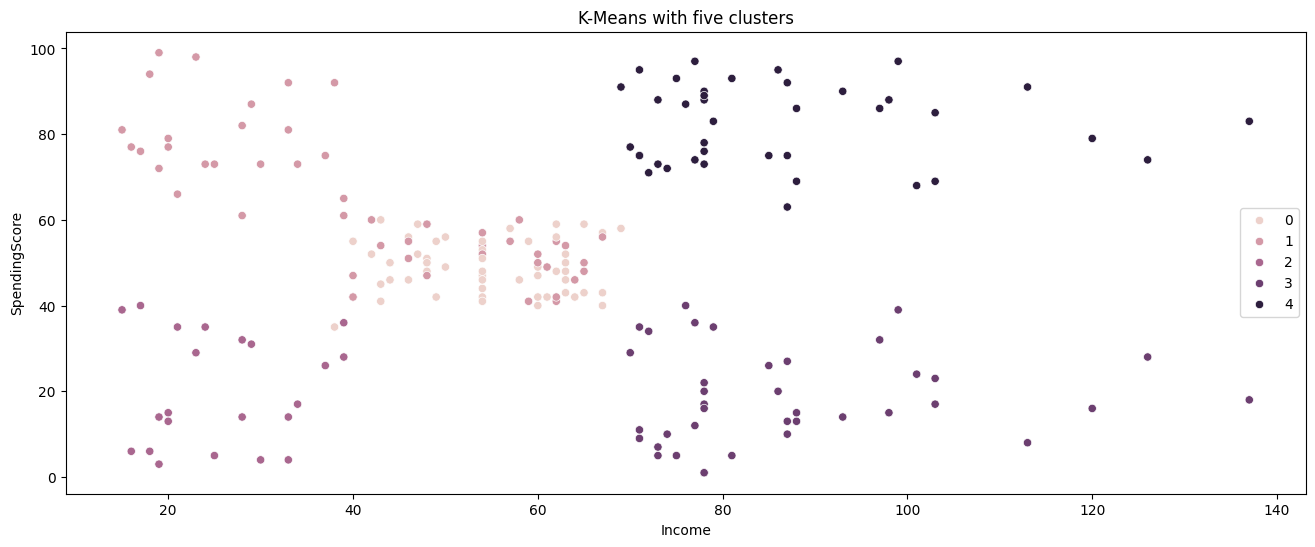

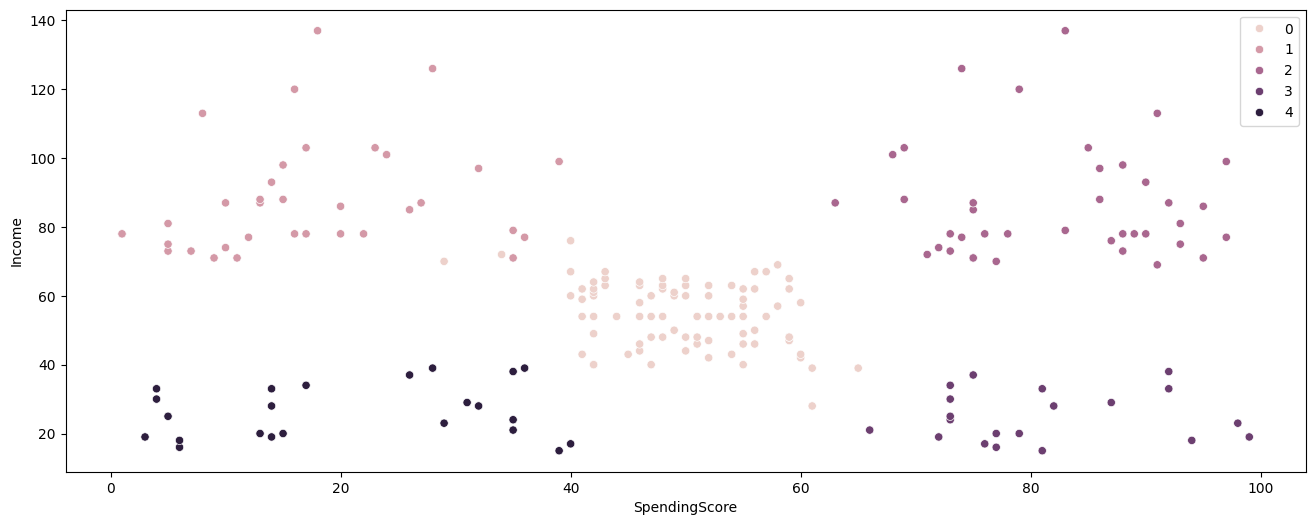

In [35]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='Income', y='SpendingScore', hue=five_clusters, data=X)
plt.title("K-Means with five clusters")
plt.xlabel("Income")
plt.ylabel("SpendingScore")
plt.show()

ward_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
first_cluster = ward_clustering.fit_predict(X)
plt.figure(figsize=(16, 6))
sns.scatterplot(x='SpendingScore', y='Income', data=X, hue=first_cluster)
plt.show()

**Висновки з завдання 13 (детальні)**

у завданні 13 були порівняні результати кластеризації методами K-Means та агломеративної ієрархічної кластеризації (ward) з однаковою кількістю кластерів (5). обидва методи дали схожі результати. групи клієнтів чітко розподілились за доходом та рівнем витрат. візуалізація показує, що K-Means формує більш чіткі й симетричні межі між кластерами, тоді як ієрархічна кластеризація показує м’якший перехід між групами. незважаючи на різну орієнтацію осей на графіках, суть поділу залишається подібною. обидва методи підтверджують доцільність поділу саме на п’ять сегментів. K-Means трохи точніше виділяє межі, а Agglomerative краще підходить для виявлення плавних переходів між типами клієнтів